In [3]:
import os
import numpy as np
import plotly.graph_objects as go

import gzip
import pickle as pkl

def loadall_results2(path, n_folds):
    result = []
    with gzip.open(  path ,'rb') as f:
        for i in range(n_folds):

            try:
                data = pkl.load(f)

                result.append( data ) 
            except EOFError:

                break
    
    return np.array(result)

[]

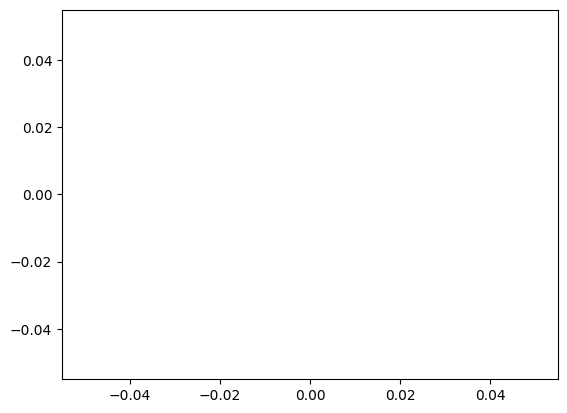

In [11]:
import matplotlib.pyplot as plt
n_folds = 10
horizon = 9999

context = 'MNIST'

direct = './results/'
path = os.path.join(direct, 'case4_{}_{}_{}_{}.pkl.gz'.format(context,horizon,n_folds,'ineural') )
result = loadall_results2(path, 20)
result = result[1:]
plt.plot(range(9999), result.T)


In [12]:

horizon = 9999
context = 'MNIST'


# colors = [ [0,255,255], [0,0,255], [0,128,0], [128,0,255], [0,0,0], [0,0,0] ]

# labels = [    'neuralcbpside', 'randneuralcbpside',  'margin' , 'cesa', 'ineural' , 'random'] 



# colors = [  [0,255,255], [0,0,255], [0,128,0], [128,0,255], [150,0,50], [0,0,0] ]
# labels = [   'EEneuralcbpside',  'randneuralcbpside', 'random', 'random2', 'ineural' ] 
# legend_labels = [ 'EEneuralcbpside', 'Randneuralcbpside', 'e-greedy1', 'e-greedy2', 'IneurAL' , ] 

material = { 
            'EEneuralcbpside_v2':{'color':[255,0,0],'label': 'EEneuralcbpside v2'},
             'EEneuralcbpside_v4':{'color':[0,255,0],'label': 'EEneuralcbpside v4'},
             'ineural':{'color':[0,0,255],'label':'IneurAL'},
              }

            # 'random2':{'color':[204,0,204],'label':'e-greedy'} 
            # 'random':{'color':[204,0,204],'label':'e-greedy'},
            #  'margin':{'color':[255,128,0],'label': 'Margin'},
            #  'cesa':{'color':[0,255,0],'label': 'Cesa'},

fig = go.Figure( )

final_regrets = []

for agent_name in material.keys():

    color, l_label = material[agent_name]['color'], material[agent_name]['label']

    r,g,b = color

    direct = './results/'
    n_folds = 10

    path = os.path.join(direct, 'case4_{}_{}_{}_{}.pkl.gz'.format(context,horizon,n_folds,agent_name) )
    result = loadall_results2(path, 12)
    result = result[1:]
    result = result.astype(np.float32)
    print(result)
    
    regret =  np.mean(result,0) 
    xcoords = np.arange(0,horizon,1).tolist()
    std =  np.std( result , 0 )
    upper_regret = regret + std

    # if agent_name == 'random2':
    #     fig.add_trace(go.Scatter(x=xcoords, y=regret, line=dict(color='rgb({},{},{})'.format(r,g,b),  dash=  'dot' ), mode='lines',  name=l_label,  showlegend=True )) 
    # else:
    fig.add_trace(go.Scatter(x=xcoords, y=regret, line=dict(color='rgb({},{},{})'.format(r,g,b),  dash=  'solid' ), mode='lines',  name=l_label,  showlegend=True )) 
    
    fig.add_trace(   go.Scatter( x=xcoords+xcoords[::-1], y=upper_regret.tolist()+regret.tolist()[::-1],  fill='toself', fillcolor='rgba({}, {}, {},0.2)'.format(r,g,b), 
                            line=dict(color='rgba(255,255,255,0)'),   hoverinfo="skip",  showlegend=False )   )

fig.update_layout(autosize=False,
                  xaxis_title="Sequence", yaxis_title="Regret and Standard Dev.",  margin=go.layout.Margin( l=0,   r=0,   b=0,    t=0, ),   
                  font=dict(size=20,),
                  legend= dict(yanchor="top",y=0.98,xanchor="left",x=0.1) )

# fig.update_yaxes( type="log" )
# fig.update_xaxes( type="log" )

# fig.update_layout( yaxis=dict(range=[0, 10000] ) )

fig.show()
# fig.write_image("./figures/case4.pdf" )

[[1.0000e+00 2.0000e+00 3.0000e+00 ... 1.7135e+03 1.7145e+03 1.7145e+03]
 [1.0000e+00 2.0000e+00 3.0000e+00 ... 1.7755e+03 1.7755e+03 1.7765e+03]
 [5.0000e-01 1.0000e+00 1.5000e+00 ... 2.3835e+03 2.3845e+03 2.3845e+03]
 ...
 [5.0000e-01 1.0000e+00 1.5000e+00 ... 2.2625e+03 2.2625e+03 2.2625e+03]
 [1.0000e+00 2.0000e+00 3.0000e+00 ... 2.1560e+03 2.1560e+03 2.1560e+03]
 [1.0000e+00 2.0000e+00 3.0000e+00 ... 2.2145e+03 2.2145e+03 2.2145e+03]]
[[5.0000e-01 1.0000e+00 1.5000e+00 ... 3.7180e+03 3.7180e+03 3.7180e+03]
 [5.0000e-01 1.0000e+00 1.5000e+00 ... 3.2195e+03 3.2195e+03 3.2195e+03]
 [5.0000e-01 1.0000e+00 1.5000e+00 ... 3.0965e+03 3.0965e+03 3.0965e+03]
 ...
 [1.0000e+00 2.0000e+00 3.0000e+00 ... 1.7350e+03 1.7350e+03 1.7350e+03]
 [5.0000e-01 1.5000e+00 2.5000e+00 ... 1.7375e+03 1.7385e+03 1.7385e+03]
 [1.0000e+00 2.0000e+00 3.0000e+00 ... 1.6935e+03 1.6935e+03 1.6935e+03]]
[]
